In [1]:
import pandas as pd
import spacy
# Our spaCy model:
nlp = spacy.load('en_core_web_sm')

In [36]:
df =pd.read_csv('/home/iftekhar/Repos/depression_suicide_project/Pretrained_embedding_models/dataset/suicide/CSSRS/Suicide_Detection_processed.csv', index_col=0)

In [4]:
df = pd.read_csv('/home/iftekhar/Repos/depression_suicide_project/Pretrained_embedding_models/dataset/English_textbook_NCBI_9_10.csv', index_col=0)

In [23]:
df.head()

,lessons,Post
0,The aim of secondary education is to make the ...,aim secondary education learner fit entry high...
1,The Tale of Homecoming\n \n Bangabandhu's Home...,tale homecoming bangabandhu homecoming january...
2,Bangabandhu at the UN\n 1\tED\tTIO\tS\n A...,bangabandhu tio work pair discuss follow quest...
3,Have You anyFavourite Pastime?\n A\tLook at th...,anyfavourite pastime look picture person dothe...
4,Change in Pastime\n A\tRead the text.\n Childh...,change pastime read text childhood outdoor pas...


In [24]:
len(df)

60

In [34]:
df.to_csv('/home/iftekhar/Repos/depression_suicide_project/Pretrained_embedding_models/dataset/suicide/CSSRS/Suicide_Detection_processed.csv')

In [9]:
def remove_noisy_features(tok):
    # remove words less than 3 characters
    collect_text = []
    for i in tok:
        if len(i) > 2:
            collect_text.append(i)
    return ' '.join(collect_text)

In [10]:
df['processed'] = df.processed.apply(lambda x: remove_noisy_features(x.split()))

In [12]:
# df = df.drop(['Post'], axis=1)
df.rename(columns={'processed': 'Post'}, inplace=True)

In [25]:
# Tags I want to remove from the text
removal= ['DET','ADP','SPACE', 'NUM', 'SYM', 'AUX', 'PRON','CCONJ','PUNCT','PART']

def prepare_tokens_cleaning(lines):
    return ' '.join([token.lemma_.lower() for token in nlp(lines) 
            if token.pos_ not in removal and not token.is_stop and token.is_alpha])

In [26]:
df['post'] = df.Post.apply(lambda x: prepare_tokens_cleaning(x))

In [21]:
df.Post.values[1]

'tale homecoming bangabandhu homecoming january work pair discuss follow question picture identify picture find connection picture title lesson read story bangabandhu homecoming answer question follow bangabandhu sheikh mujibur rahman arrest pakistani army immediately declaration independence hour march take pakistan captive imprison small cell capital punishment january grave dig cell mujib fearless know stop bangalees gain independence fact independence synonymous world await breathlessly witness homecoming grand homecoming narrate eminent columnist writer syed badrul ahsan abridge version narration present even january bangabandhu leave chaklala airport rawalpindi fly london month early bring pakistan prisoner little hope return free home pakistan soon pia aircraft take finally early morning january bangabandhu arrive heathrow airport news bangabandhu arrival london spread quickly journalist general public british official politician bangalee resident city way hotel claridges news b

#### https://medium.com/grabngoindfo/topic-modeling-with-deep-learning-using-python-bertopic-cdf91df5676504

In [15]:
# Data processing
import pandas as pd
import numpy as np
# Text preprocessiong
import nltk
# nltk.download('stopwords')
# nltk.download('omw-1.4')
# nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
# Topic model
from bertopic import BERTopic
# Dimension reduction
from umap import UMAP

/home/iftekhar/my-project-env/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/iftekhar/my-project-env/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/iftekhar/my-project-env/lib/python3.8/site-packages/umap/distances.py:1086: 

In [39]:
ind = df[df['Label']=='Indicator']
att = df[df['Label']=='Attempt']
beh = df[df['Label']=='Behavior']
ide = df[df['Label']=='Ideation']

In [16]:
def initiate_umap(dataframe):
    # Initiate UMAP
    umap_model = UMAP(n_neighbors=15, 
                      n_components=5, 
                      min_dist=0.0, 
                      metric='cosine', 
                      random_state=100)
    # Initiate BERTopic
    topic_model = BERTopic(umap_model=umap_model, language="english", calculate_probabilities=True)
    # Run BERTopic model
    topics, probabilities = topic_model.fit_transform(dataframe['Post'])
    return topic_model

In [17]:
tp_model = initiate_umap(df)


In [18]:
# Get the list of topics
tp_model.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,-1,60,-1_people_read_question_follow,"[people, read, question, follow, day, country,...",[mother day look picture discuss think woman c...


In [19]:
# Get top 10 terms for a topic
tp_model.get_topic(0)

False

In [20]:
# Visualize top topic keywords
tp_model.visualize_barchart(top_n_topics=12)

ValueError: 
The 'rows' argument to make_suplots must be an int greater than 0.
    Received value of type <class 'int'>: 0

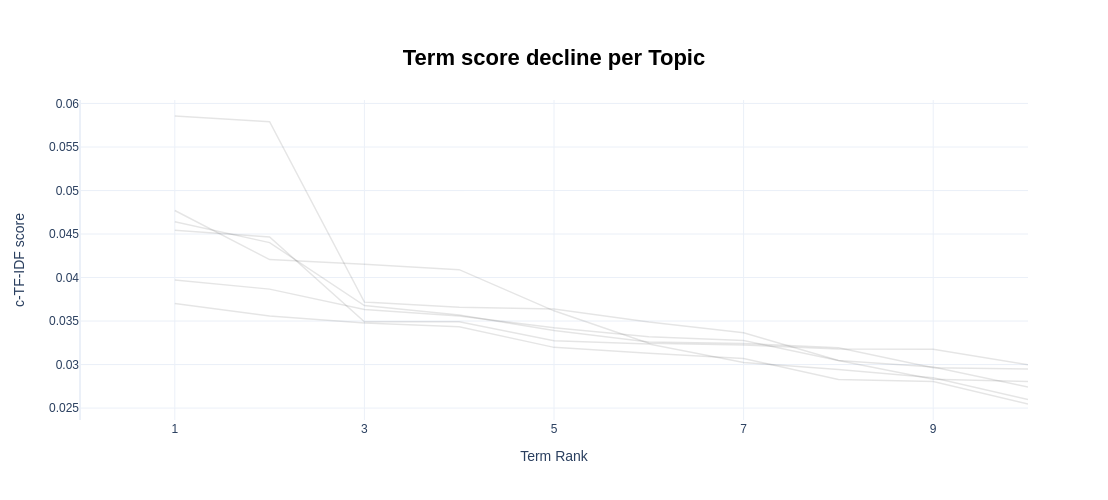

In [79]:
# Visualize term rank decrease
tp_model.visualize_term_rank()

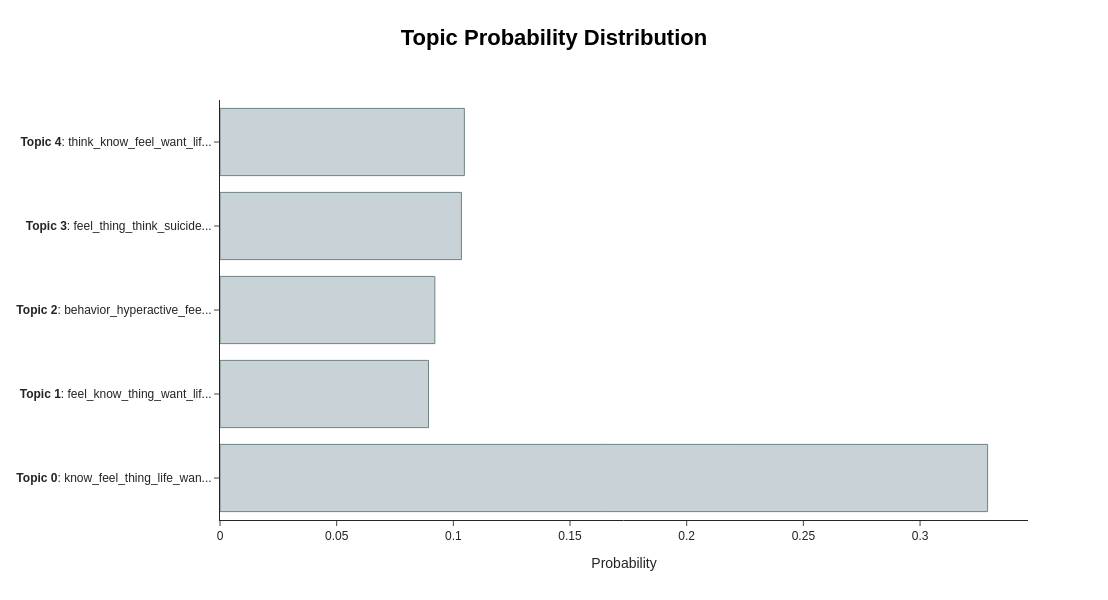

In [80]:
# Visualize probability distribution
tp_model.visualize_distribution(tp_model.probabilities_[0], min_probability=0.015)

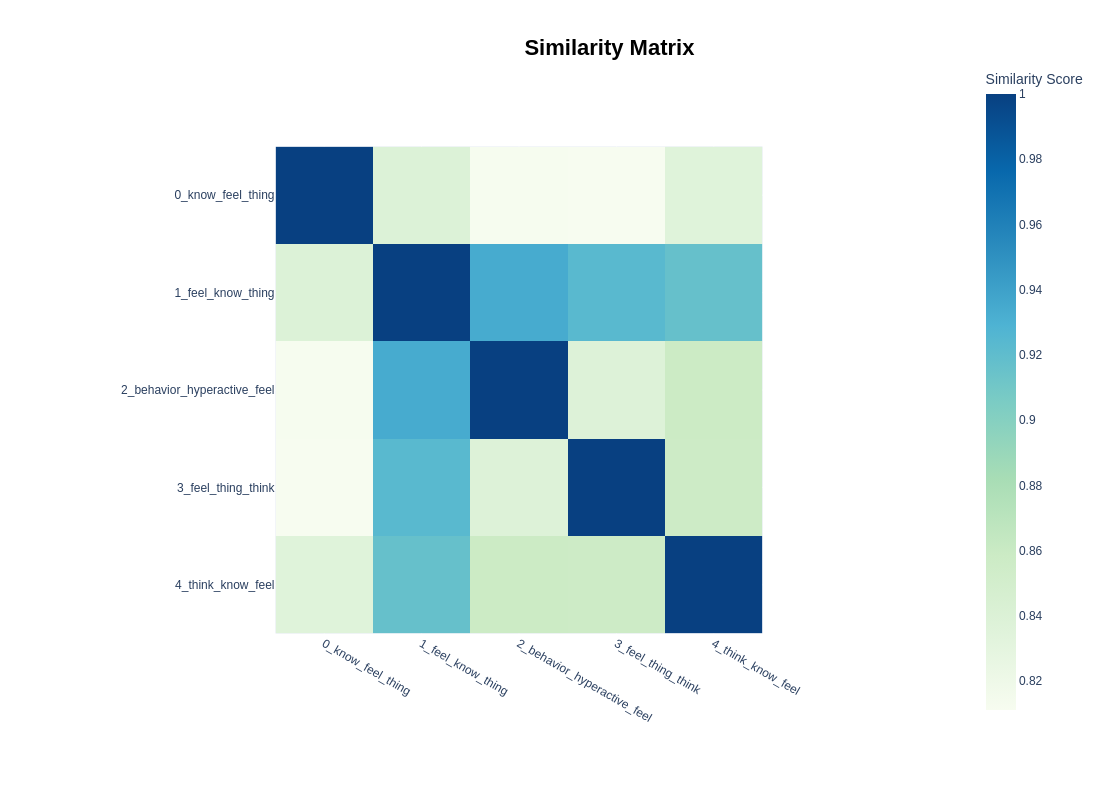

In [81]:
# Visualize similarity using heatmap
tp_model.visualize_heatmap()

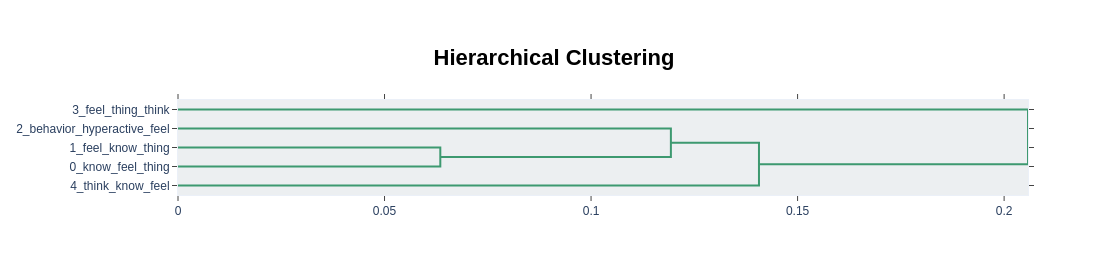

In [82]:
# Visualize connections between topics using hierachical clustering
tp_model.visualize_hierarchy(top_n_topics=10)

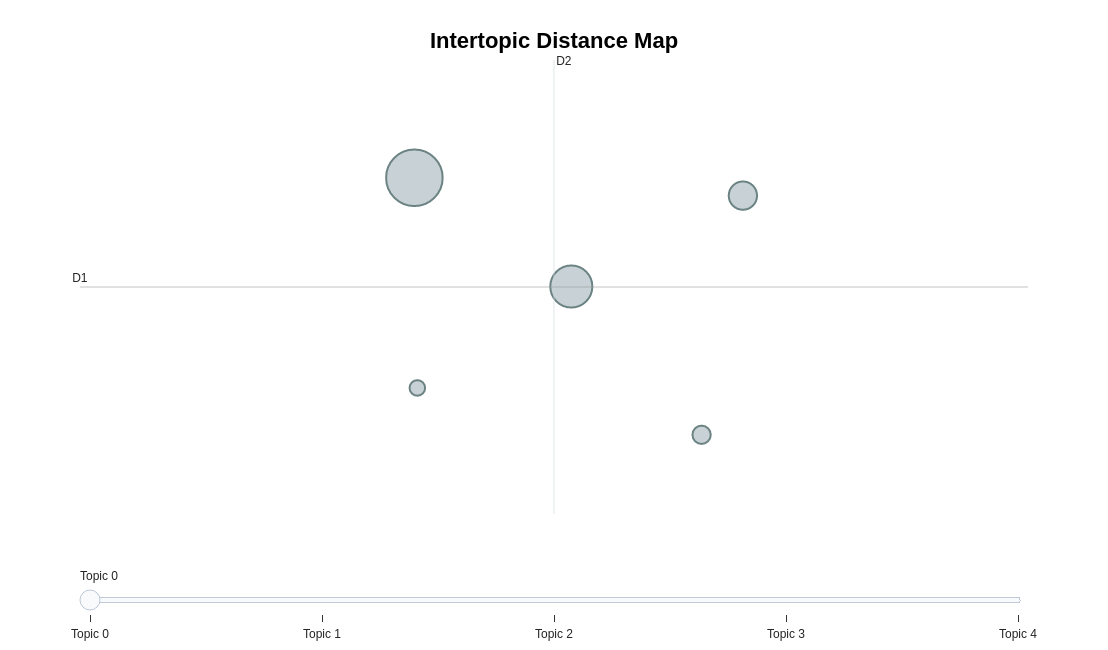

In [83]:
# Visualize intertopic distance
tp_model.visualize_topics()